In [1]:
# Copyright Tay Zhi Cong, year 2025

import numpy as np

In [2]:
def polyphase_channelizer(x, h, M): 
    # x: input signal, h: prototype filter, M: number of channels 
    L = len(h) // M # Length of each polyphase sub-filter 
    E = h.reshape(M, L) # Polyphase decomposition (row-major)
    # Step 1: Polyphase filtering 
    y = np.zeros((M, len(x) // M), dtype=complex) 
    for k in range(M): 
        x_k = x[k::M] 
        # Decimate by M (phase k) 
        y[k] = np.convolve(x_k, E[k], mode='valid')
        # Step 2: FFT per block 
        Y = np.fft.fft(y, axis=0) 
    return Y # Y[p, m] = p-th channel at time m

In [3]:
def polyphase_channelizer(x, h, M): 
    # x: input signal, h: prototype filter, M: number of channels 
    L = len(h) // M # Length of each polyphase sub-filter 
    E = h.reshape(M, L) # Polyphase decomposition (row-major)
    # Step 1: Polyphase filtering 
    y = np.zeros((M, len(x) // M), dtype=complex) 
    for k in range(M): 
        x_k = x[k::M] 
        # Decimate by M (phase k) 
        y[k] = np.convolve(x_k, E[k], mode='valid')
        # Step 2: FFT per block 
        Y = np.fft.fft(y, axis=0) 
    return Y # Y[p, m] = p-th channel at time m

In [4]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy import signal 

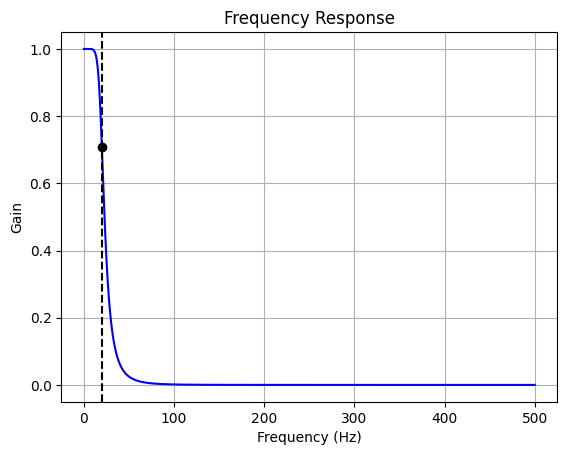

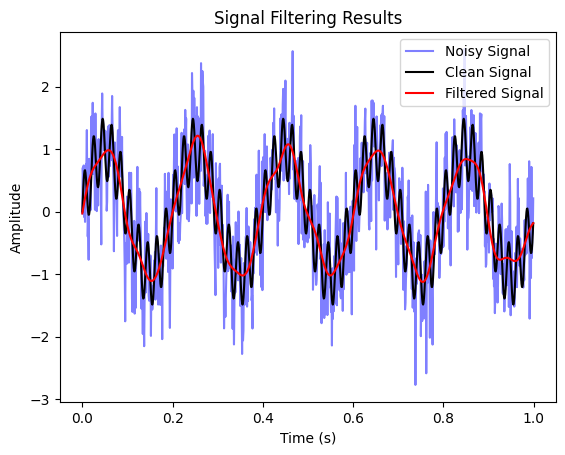

In [5]:
# 1. Generate a noisy signal 
fs = 1000 # Sampling frequency (Hz) 
t = np.arange(0, 1, 1/fs) # Time vector (1 second) 
f1, f2 = 5, 50 # Signal frequencies (Hz) 
signal_clean = np.sin(2 * np.pi * f1 * t) + 0.5 * np.sin(2 * np.pi * f2 * t) 
signal_noisy = signal_clean + 0.5 * np.random.randn(len(t)) # Add noise 
# 2. Design a Butterworth low-pass filter 
cutoff_freq = 20 # Cutoff frequency (Hz) 
nyquist_freq = 0.5 * fs # Nyquist frequency 
order = 4 # Filter order 
b, a = signal.butter(order, cutoff_freq / nyquist_freq, 'lowpass') 
# 3. Analyze the filter's frequency response 
w, h = signal.freqz(b, a, worN=8000) 
plt.figure() 
plt.plot(0.5 * fs * w / np.pi, np.abs(h), 'b') 
plt.plot(cutoff_freq, 0.5 * np.sqrt(2), 'ko') # -3 dB point 
plt.axvline(cutoff_freq, color='k', linestyle='--') 
plt.title("Frequency Response") 
plt.xlabel("Frequency (Hz)") 
plt.ylabel("Gain") 
plt.grid() 
# 4. Apply the filter (zero-phase filtering) 
filtered_signal = signal.filtfilt(b, a, signal_noisy) 
# 5. Plot results 
plt.figure() 
plt.plot(t, signal_noisy, 'b', alpha=0.5, label="Noisy Signal") 
plt.plot(t, signal_clean, 'k', label="Clean Signal") 
plt.plot(t, filtered_signal, 'r', label="Filtered Signal") 
plt.legend() 
plt.xlabel("Time (s)") 
plt.ylabel("Amplitude") 
plt.title("Signal Filtering Results") 
plt.show()

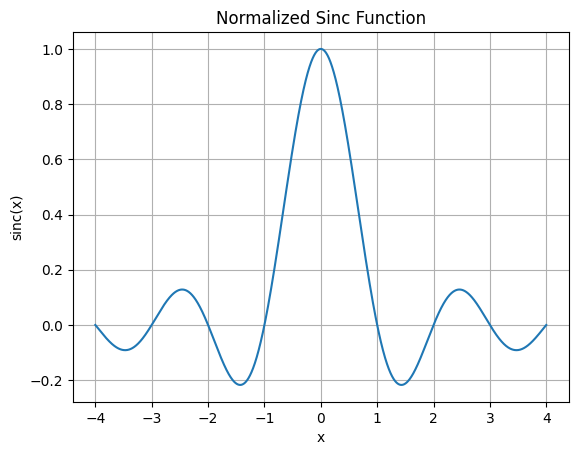

In [6]:
# 1. Generate a noisy signal 
fs = 1000 # Sampling frequency (Hz) 
t = np.arange(-4, 4, 1/fs) # Time vector (1 second) 
y = np.sinc(t)
plt.plot(t, y)
plt.title('Normalized Sinc Function')
plt.xlabel('x')
plt.ylabel('sinc(x)')
plt.grid(True)
plt.show()


beta is 5.65326
filter length is 75


(-0.02, 0.02)

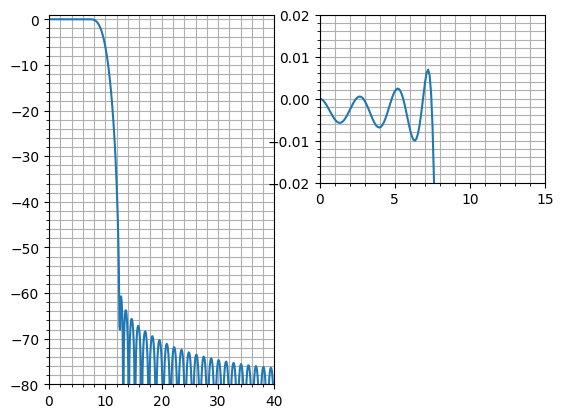

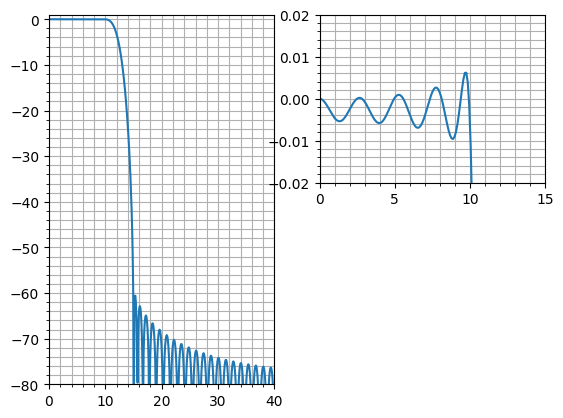

In [7]:
import math
beta = signal.kaiser_beta(60) # 1. calculate the kaiser beta
filter_length = math.ceil((100/5) * (60-8)/14) # 2. estimate the filter length : N ~= f_sampling/ f_transition * (Attenuation (in dB) - 8) / 14
print('beta is', beta)
print('filter length is', filter_length)

# Method 1
filter_tap = signal.windows.kaiser(filter_length, beta=beta)
hh1=np.sinc(0.2*np.linspace(-37,37,75))*filter_tap

# Method 2
b = signal.firwin(filter_length, 0.2, window=('kaiser', beta), fs=2)
w, h = signal.freqz(b)

# investigate that method1 and method2 returns identical filter weights
#print(hh1/sum(hh1)-b)
plt.figure()
ax = plt.subplot(1,2,1)
plt.plot(w/2/(np.pi)*100, 20 * np.log10(abs(h)), 'C0')
plt.grid(which="major")
plt.grid(which="minor")
plt.minorticks_on()
ax.set_xlim(0, 40)
ax.set_ylim(-80, 1)

ax = plt.subplot(2,2,2)
plt.plot(w/2/(np.pi)*100, 20 * np.log10(abs(h)), 'C0')
plt.grid(which="major")
plt.grid(which="minor")
plt.minorticks_on()

# Define the desired zoom region
x_min, x_max = 0, 15
y_min, y_max = -0.02, 0.02

# Set the x and y limits of the axes to zoom to the rectangle
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

b = signal.firwin(filter_length, 0.25, window=('kaiser', beta), fs=2)
w, h = signal.freqz(b)

plt.figure()
ax = plt.subplot(1,2,1)
plt.plot(w/2/(np.pi)*100, 20 * np.log10(abs(h)), 'C0')
plt.grid(which="major")
plt.grid(which="minor")
plt.minorticks_on()
ax.set_xlim(0, 40)
ax.set_ylim(-80, 1)

ax = plt.subplot(2,2,2)
plt.plot(w/2/(np.pi)*100, 20 * np.log10(abs(h)), 'C0')
plt.grid(which="major")
plt.grid(which="minor")
plt.minorticks_on()

# Define the desired zoom region
x_min, x_max = 0, 15
y_min, y_max = -0.02, 0.02

# Set the x and y limits of the axes to zoom to the rectangle
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

taps[0] 0.0006319340170670787
taps[1] 0.00038077371625088157
taps[67] 0.00038077371625088157
taps[68] 0.0006319340170670787


(-0.005, 0.005)

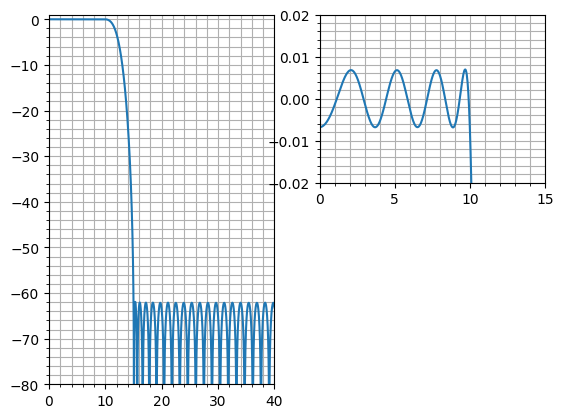

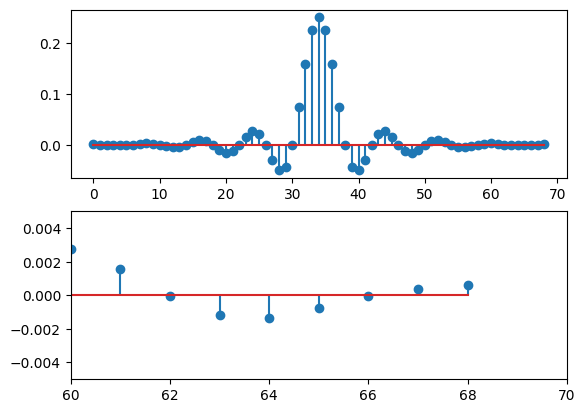

In [8]:
fs = 100
cutoff = 10.0    # Desired cutoff frequency, Hz
trans_width = 5  # Width of transition from pass to stop, Hz
numtaps = 69      # Size of the FIR filter.
taps = signal.remez(numtaps, [0, cutoff, cutoff + trans_width, 0.5*fs],
                    [1, 0], fs=fs)
print('taps[0]', taps[0])
print('taps[1]', taps[1])
print('taps[67]', taps[67])
print('taps[68]', taps[68])

#modified boundary samples
# taps[0] = 0.0004
# taps[68] = 0.0004

w, h = signal.freqz(taps, [1], worN=2000, fs=fs)

plt.figure()
ax = plt.subplot(1,2,1)
plt.plot(w, 20 * np.log10(abs(h)), 'C0')
plt.grid(which="major")
plt.grid(which="minor")
plt.minorticks_on()
ax.set_xlim(0, 40)
ax.set_ylim(-80, 1)

ax = plt.subplot(2,2,2)
plt.plot(w, 20 * np.log10(abs(h)), 'C0')
plt.grid(which="major")
plt.grid(which="minor")
plt.minorticks_on()

# Define the desired zoom region
x_min, x_max = 0, 15
y_min, y_max = -0.02, 0.02

# Set the x and y limits of the axes to zoom to the rectangle
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

plt.figure()
ax = plt.subplot(2,1,1)
plt.stem(taps)
ax = plt.subplot(2,1,2)
plt.stem(taps)

# Define the desired zoom region
x_min, x_max = 60, 70
y_min, y_max = -0.005, 0.005

# Set the x and y limits of the axes to zoom to the rectangle
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

beta is 5.65326
filter length is 93

[0 1 2 3 4 5 6 7]

out shape is (218,)
shape is (180,)
shape is (180,)


(0.0, 1024.0)

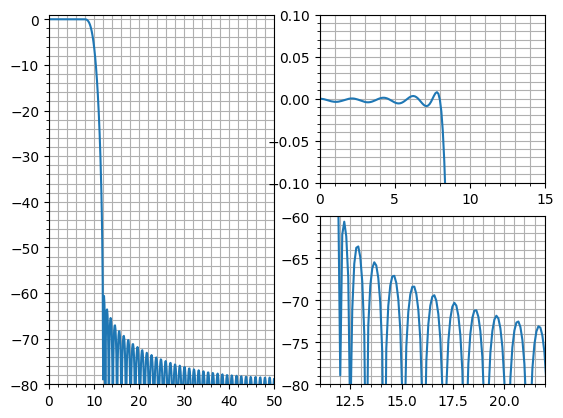

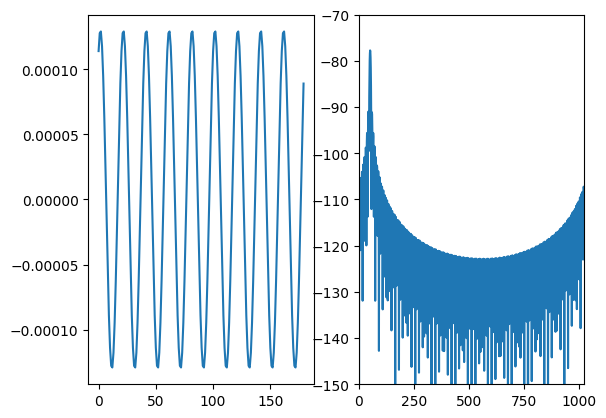

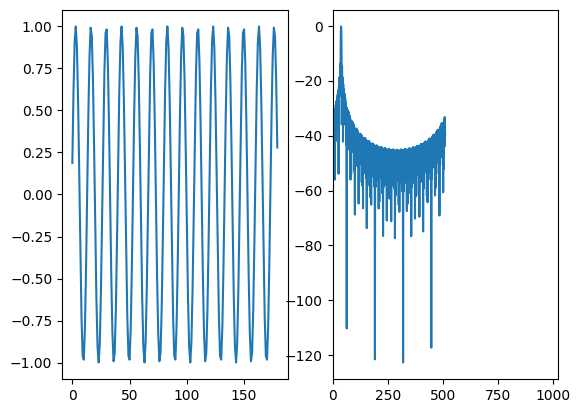

In [21]:
import math
beta = signal.kaiser_beta(60) # 1. calculate the kaiser beta
filter_length = math.ceil((100/4) * (60-8)/14) # 2. estimate the filter length : N ~= f_sampling/ f_transition * (Attenuation (in dB) - 8) / 14
print('beta is', beta)
print('filter length is', filter_length)

# Method 1
# filter_tap = signal.windows.kaiser(filter_length, beta=beta)
# hh1=np.sinc(0.2*np.linspace(-37,37,75))*filter_tap

# Method 2
filter_length = 95
b = signal.firwin(filter_length, 10, window=('kaiser', beta), fs=100)
w, h = signal.freqz(b)

# investigate that method1 and method2 returns identical filter weights
#print(hh1/sum(hh1)-b)
plt.figure()
ax = plt.subplot(1,2,1)
plt.plot(w/np.pi*50, 20 * np.log10(abs(h)), 'C0')
plt.grid(which="major")
plt.grid(which="minor")
plt.minorticks_on()
ax.set_xlim(0, 50)
ax.set_ylim(-80, 1)

ax = plt.subplot(2,2,2)
plt.plot(w/2/(np.pi)*100, 20 * np.log10(abs(h)), 'C0')
plt.grid(which="major")
plt.grid(which="minor")
plt.minorticks_on()

# Define the desired zoom region
x_min, x_max = 0, 15
y_min, y_max = -0.1, 0.1

# Set the x and y limits of the axes to zoom to the rectangle
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)


ax = plt.subplot(2,2,4)
plt.plot(w/2/(np.pi)*100, 20 * np.log10(abs(h)), 'C0')
plt.grid(which="major")
plt.grid(which="minor")
plt.minorticks_on()

# Define the desired zoom region
x_min, x_max = 11, 22
y_min, y_max = -80, -60

# Set the x and y limits of the axes to zoom to the rectangle
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

n = np.arange(0, 1000, 1)
x1_orig = np.exp(1j*2*np.pi*n*21/100);
b = np.reshape(b, (19, 5))
x1 = np.reshape(x1_orig, (200,5))


plt.figure()
ax = plt.subplot(1,2,1)

# output_reg = np.zeros((1,218))
# for i in range(5):
#     output_reg = output_reg + np.convolve(x1[:,i], b[:,i]/sum(b[:,i]))
# # first_path_result = np.convolve(x1[:,0], b[:,0]/sum(b[:,0]))
# print(output_reg)
first_path_result = np.convolve(x1[:,4], b[:,0])
second_path_result = np.convolve(x1[:,3], b[:,1])
third_path_result = np.convolve(x1[:,2], b[:,2])
forth_path_result = np.convolve(x1[:,1], b[:,3])
fifth_path_result = np.convolve(x1[:,0], b[:,4])
out = first_path_result+second_path_result+third_path_result+forth_path_result+fifth_path_result
print()
plt.plot(np.real(out[19:218-19]))

out = out[19:218-19]
ax = plt.subplot(1,2,2)
out_fft = 1/len(out) * np.fft.fft(out, 1024)
#out_fft = np.fft.fft(np.exp(2j * np.pi * np.arange(0, 2048, 1)*3 / 8))
plt.plot(20*np.log10(np.abs(out_fft)))
ax.set_xlim(0, 1024)
ax.set_ylim(-150, -70)
print(np.arange(8))
# plt.plot(np.real(first_path_result))
# plt.plot(np.real(second_path_result))
# # plt.plot(np.real(np.convolve(x1[:,0], b[:,0])))
# # plt.plot(np.real(np.convolve(x1[:,1], b[:,1])))
# fft_first_path_result = np.fft.fftshift(np.fft.fft(20*np.log10(abs(first_path_result)),1024))
# plt.plot(np.real(first_path_result))
# plt.plot(np.real(x1[:,0]))
# #print(x1)

x2 = x1_orig + np.exp(1j*2*np.pi*n*1.5/100);
x2 = np.reshape(x2, (200,5))
first_path_result = np.convolve(x1[:,0], b[:,0]/sum(b[:,0]))

plt.figure()
ax = plt.subplot(1,2,1)

# output_reg = np.zeros((1,218))
# for i in range(5):
#     output_reg = output_reg + np.convolve(x1[:,i], b[:,i]/sum(b[:,i]))
# # first_path_result = np.convolve(x1[:,0], b[:,0]/sum(b[:,0]))
# print(output_reg)
first_path_result = np.convolve(x2[:,4], b[:,0])
second_path_result = np.convolve(x2[:,3], b[:,1])
third_path_result = np.convolve(x2[:,2], b[:,2])
forth_path_result = np.convolve(x2[:,1], b[:,3])
fifth_path_result = np.convolve(x2[:,0], b[:,4])
out = first_path_result+second_path_result+third_path_result+forth_path_result+fifth_path_result
print()
plt.plot(np.real(out[19:218-19]))
print("out shape is", out.shape)
print("shape is", out[19:218-19].shape)
print("shape is", out[19:-19].shape)

out = out[19:218-19]
ax = plt.subplot(1,2,2)
out_fft = 1/len(out) * np.fft.fft(out, 512)
#out_fft = np.fft.fft(np.exp(2j * np.pi * np.arange(0, 2048, 1)*3 / 8))
plt.plot(20*np.log10(np.abs(out_fft)))
ax.set_xlim(0, 1024)
#ax.set_ylim(-80, 0)
